# 0. Setup

In [2]:
import nilearn
import pandas as pd
import numpy as np
import os

from nilearn import plotting
from nilearn import connectome
from nilearn import datasets
from nilearn import image


In [3]:
# Set the path to the data directory
src_dir = '../data/derivatives/fc_mvpa'

# Set the participant and session IDs
part_id = 'sub-10'
ses_id = 'ses-01'


# 1. Load Mask / atlas / meta

['Background', 'Frontal Pole', 'Insular Cortex', 'Superior Frontal Gyrus', 'Middle Frontal Gyrus', 'Inferior Frontal Gyrus, pars triangularis', 'Inferior Frontal Gyrus, pars opercularis', 'Precentral Gyrus', 'Temporal Pole', 'Superior Temporal Gyrus, anterior division', 'Superior Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, anterior division', 'Middle Temporal Gyrus, posterior division', 'Middle Temporal Gyrus, temporooccipital part', 'Inferior Temporal Gyrus, anterior division', 'Inferior Temporal Gyrus, posterior division', 'Inferior Temporal Gyrus, temporooccipital part', 'Postcentral Gyrus', 'Superior Parietal Lobule', 'Supramarginal Gyrus, anterior division', 'Supramarginal Gyrus, posterior division', 'Angular Gyrus', 'Lateral Occipital Cortex, superior division', 'Lateral Occipital Cortex, inferior division', 'Intracalcarine Cortex', 'Frontal Medial Cortex', 'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)', 'Subcallosal Cortex', 'Paracingulate

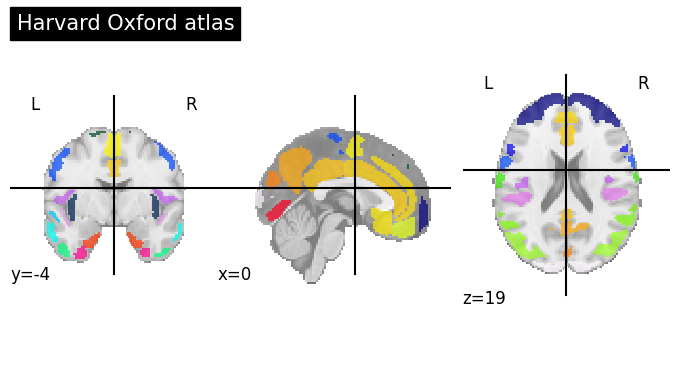

In [4]:
from nilearn import datasets
atlas = datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr50-2mm')
atlas_filename = atlas.maps

# list of labels
labels = atlas.labels

print(labels)

# number of regions
number_of_regions = len(labels[1:])
print(number_of_regions)

# plot the atlas
from nilearn import plotting
plotting.plot_roi(atlas_filename, title="Harvard Oxford atlas")

# 2. Load data.

In [5]:
data_dir = os.path.join(src_dir, part_id, ses_id)


fn = f'{part_id}_{ses_id}_task-02a-MVPA-12sBOLD_correlation-matrix.csv'


# Load feature set without index column.
X = pd.read_csv(os.path.join(data_dir, fn), index_col=0)

# Load csv file with targets.
target_set = pd.read_csv(os.path.join(data_dir, f'{part_id}_{ses_id}_task-02a-MVPA-12sBOLD_targets.csv'))

# Load csv file with groups.
group_set = pd.read_csv(os.path.join(data_dir, f'{part_id}_{ses_id}_task-02a-MVPA-12sBOLD_groups.csv'))

In [6]:
X

,0,1,2,3,4,5,6,7,8,9,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,1.0,0.472867,0.436031,0.514384,0.538561,0.383304,0.361168,0.270609,0.238606,0.434412,...,0.539531,0.514461,0.389919,0.415573,0.367763,0.087698,0.111545,0.141712,0.455021,1.0
1,1.0,0.349611,0.668151,0.626731,0.602441,0.238092,0.125390,0.648085,0.319852,0.558617,...,0.180248,0.229835,-0.118430,0.037520,0.066224,-0.109608,-0.131272,0.225610,0.430073,1.0
2,1.0,0.437966,0.548335,0.568625,0.320594,0.262169,0.543516,0.671902,0.369025,0.427831,...,0.378764,0.555047,-0.065700,0.387637,0.269983,-0.058294,0.168840,0.260122,0.540543,1.0
3,1.0,0.448497,0.583478,0.519315,0.397270,0.154706,0.509454,0.605059,0.023484,0.464463,...,0.450476,0.618124,-0.053374,0.337868,0.250099,-0.192076,-0.011393,0.058183,0.379482,1.0
4,1.0,0.493920,0.478096,0.503723,0.400250,0.286006,0.582199,0.514801,0.135923,0.271833,...,0.174668,0.388716,0.412687,0.179425,0.104147,-0.088435,0.265158,0.298934,0.473302,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,0.398384,0.519039,0.171393,0.237881,0.234724,0.391118,0.484918,0.102054,0.102346,...,0.379838,0.366767,-0.022971,0.216385,0.267523,-0.128571,0.063801,0.148280,0.475625,1.0
72,1.0,0.619738,0.658710,0.591666,0.267869,0.666599,0.756025,0.673688,0.386197,0.678179,...,0.418409,0.627331,0.023029,0.621386,0.514178,0.439777,0.469907,0.517417,0.593605,1.0
73,1.0,0.396131,0.694257,0.660639,0.212614,0.352581,0.512189,0.349390,-0.281890,-0.195372,...,0.661415,0.534743,0.294292,0.525161,0.416039,-0.259563,0.304586,0.069270,0.391460,1.0
74,1.0,0.613916,0.725165,0.453658,0.278723,0.682547,0.661304,0.316044,0.007664,0.054449,...,0.676797,0.738578,-0.034625,0.486314,0.728473,0.058598,0.128654,-0.001377,0.512728,1.0


# 3. Classification using scikit routines

In [7]:
from nilearn.maskers import NiftiMasker
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneGroupOut

from nilearn.decoding import Decoder
# “background”: Use this option if your images present a clear homogeneous background.
# “whole-brain-template”: This will extract the whole-brain part of your data by resampling 
# the MNI152 brain mask for your data’s field of view.


logo = LeaveOneGroupOut()

In [8]:
# Extract values without the index column
X = X.values

In [9]:
y = list(target_set['target'])

# transform the target_set unique strings to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# 0 agaisnt all others
# y = np.where(y == 1, 0, 1)

print(y)


[1 8 8 0 0 3 3 2 2 7 7 5 5 6 6 9 9 4 4 1 8 8 3 3 9 9 5 5 4 4 6 6 0 0 7 7 2
 2 1 7 7 9 9 6 6 2 2 5 5 4 4 3 3 0 0 8 8 1 5 5 4 4 3 3 9 9 0 0 2 2 7 7 8 8
 6 6]


In [10]:
runs_group = list(group_set['group'])

print(runs_group)

# unique values in runs_group
print(np.unique(runs_group))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]
[0 1 2 3]


In [11]:
from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average, multi_class):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average, multi_class = multi_class)
    roc_auc_dict[per_class] = roc_auc

  return roc_auc_dict

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)

accuracy = {}
lr_roc_auc_multiclass  = {}
roc_vals_mc = {}
cm = {}

f = 0

for train, test in logo.split(X, y, groups=runs_group): 
    # print("%s %s" % (train, test))
    X_train, X_test = X[train], X[test]
    y_train, y_test = y[train], y[test]

    # print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

    clf.fit(X_train, y_train)

    # predict the labels
    y_pred = clf.predict(X_test)
    y_pred_prob = clf.predict_proba(X_test)

    # compute the accuracy
    accuracy[f] = np.mean(y_pred == y_test)

    # compute the confusion matrix
    cm[f] = confusion_matrix(y_test, y_pred)

    # compute the ROC
    roc_vals = roc_auc_score_multiclass(y_test, y_pred, average = 'micro', multi_class = 'ovo')


    lr_roc_auc_multiclass[f] = list(roc_vals.values())


    roc_vals_mc[f] = roc_auc_score(y_test, y_pred_prob, multi_class='ovo', average='weighted')

    f += 1
    
print(f'Accuracy: {accuracy}')
print(f'ROC AUC: {lr_roc_auc_multiclass}')

Accuracy: {0: 0.0, 1: 0.15789473684210525, 2: 0.15789473684210525, 3: 0.21052631578947367}
ROC AUC: {0: [0.38235294117647056, 0.5, 0.4117647058823529, 0.5, 0.5, 0.47058823529411764, 0.4411764705882353, 0.29411764705882354, 0.5, 0.4411764705882353], 1: [0.9411764705882353, 0.5, 0.6617647058823529, 0.38235294117647056, 0.5, 0.47058823529411764, 0.5, 0.47058823529411764, 0.5, 0.3529411764705882], 2: [0.75, 0.5, 0.48529411764705876, 0.5, 0.5, 0.75, 0.47058823529411764, 0.4411764705882353, 0.38235294117647056, 0.5], 3: [0.6323529411764706, 0.5, 0.8823529411764706, 0.4117647058823529, 0.47058823529411764, 0.75, 0.47058823529411764, 0.5, 0.4411764705882353, 0.5]}


In [1]:
print(cm)

NameError: name 'cm' is not defined

In [393]:
roc_vals_mc

print(np.mean(list(roc_vals_mc.values())))

0.49195906432748515


In [394]:
mean_roc_auc = np.mean(list(lr_roc_auc_multiclass.values()), axis=1)

print(f'Mean ROC AUC: {mean_roc_auc}')



# compute mean of the accuracy
mean_accuracy = (list(accuracy.values()))

print(f'Mean accuracy: {mean_accuracy}')

Mean ROC AUC: [0.44411765 0.52794118 0.52794118 0.55588235]
Mean accuracy: [0.0, 0.15789473684210525, 0.15789473684210525, 0.21052631578947367]


### 3.1 Confusion Matrix

Text(0.5, 1.0, 'sub-10')

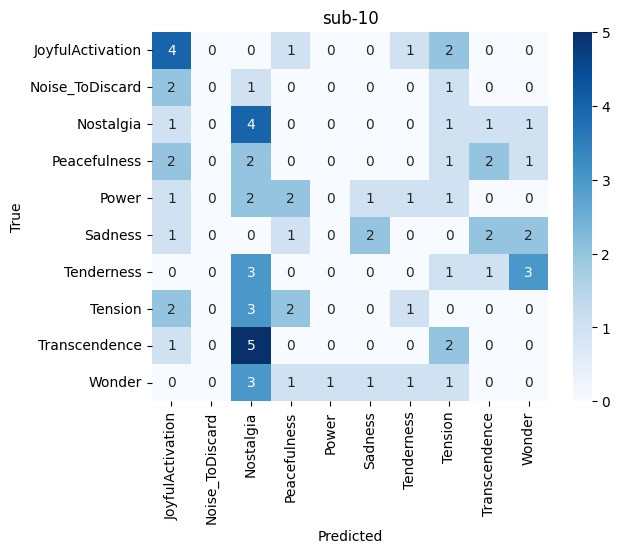

In [395]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

import seaborn as sns

# plot confusion matrix totals
cm_total = np.zeros(cm[0].shape)

for i in range(len(cm)):
    cm_total += cm[i]



Confusion_matrix=sns.heatmap(cm_total, annot= True, fmt='g', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_,)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(part_id)

In [396]:
results_dir = '../results_seb'

# package folder structure
results_fldr = os.path.join(results_dir, 'fc_mvpa_ovo', part_id, ses_id)
print(results_dir)

if not os.path.exists(results_fldr):
    os.makedirs(results_fldr)


Confusion_matrix.figure.savefig(os.path.join(results_fldr, f'{part_id}_{ses_id}_task-02a-FCMVPA_confusion_matrix.png'),  bbox_inches='tight')

../results_seb


In [397]:
from sklearn import svm, tree

#clf = svm.SVC(kernel='linear', C=1)
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=0)


# create cross validation using logo

scores = cross_val_score(clf, X, y, cv=logo, groups=runs_group,     scoring='roc_auc_ovr')

print(scores)

scores = cross_val_score(clf, X, y, cv=logo, groups=runs_group,     scoring='accuracy')

print(scores)

[0.40947712 0.57058824 0.49281046 0.50326797]
[0.         0.15789474 0.15789474 0.21052632]


### 3.2 Boxplot

Text(0.5, 1.0, 'sub-10')

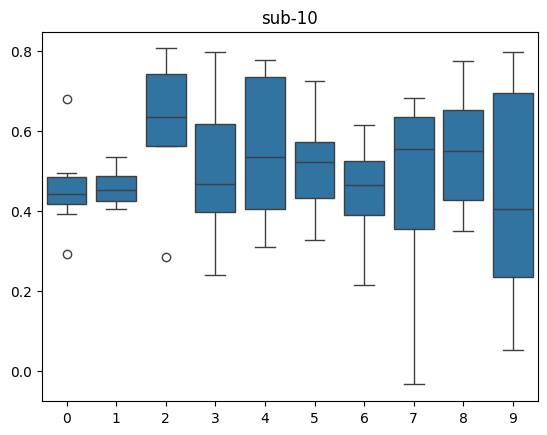

In [406]:
# Visualizer the distribution of the scores
import seaborn as sns
import matplotlib.pyplot as plt

boxplot = sns.boxplot(x=y, y = X[:,1])
plt.title(part_id)

In [399]:
results_dir = '../results_seb'

# package folder structure
results_fldr = os.path.join(results_dir, 'fc_mvpa_ovo', part_id, ses_id)
print(results_dir)

if not os.path.exists(results_fldr):
    os.makedirs(results_fldr)


boxplot.figure.savefig(os.path.join(results_fldr, f'{part_id}_{ses_id}_task-02a-FCMVPA_boxplot.png'),  bbox_inches='tight')

../results_seb
